<a href="https://colab.research.google.com/github/arrev93/fantasy_football_colab_script/blob/main/in_szn_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%capture
%pip install nflfastpy --upgrade

In [ ]:
import nflfastpy as nfl
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style('darkgrid');

In [ ]:
yo = nfl.load_pbp_data()
yo.head()

,play_id,game_id,old_game_id,home_team,away_team,season_type,week,posteam,posteam_type,defteam,...,out_of_bounds,home_opening_kickoff,qb_epa,xyac_epa,xyac_mean_yardage,xyac_median_yardage,xyac_success,xyac_fd,xpass,pass_oe
0,1,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,NaN,NaN,NaN,...,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,40,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,TEN,home,ARI,...,0,1,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,55,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,TEN,home,ARI,...,0,1,-1.399805,NaN,NaN,NaN,NaN,NaN,0.491433,-49.143299
3,76,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,TEN,home,ARI,...,0,1,0.032412,1.165133,5.803177,4.0,0.896654,0.125098,0.697346,30.265415
4,100,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,TEN,home,ARI,...,0,1,-1.532898,0.256036,4.147637,2.0,0.965009,0.965009,0.978253,2.174652


In [ ]:
yo['week'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22])

In [ ]:
yo.shape

(50712, 372)

In [ ]:
yo.columns.tolist()

In [ ]:
pass_df = yo.loc[yo['pass_attempt'] == 1, ['receiver_player_id', 'receiver_player_name', 'posteam', 'air_yards']]
# locates all pass attempts (0 means no attempt; 1 means attempt)
# lists four columns, 'receiver_player_id', 'receiver_player_name', 'posteam', 'air_yards', respectively
pass_df.head()

,receiver_player_id,receiver_player_name,posteam,air_yards
3,00-0032764,D.Henry,TEN,2.0
4,00-0032355,C.Rogers,TEN,10.0
6,00-0030564,D.Hopkins,ARI,29.0
8,00-0034681,C.Edmonds,ARI,-4.0
9,00-0027942,A.Green,ARI,20.0


In [ ]:
pass_df.isna().sum()

receiver_player_id      2009
receiver_player_name    2009
posteam                    0
air_yards               1447
dtype: int64

In [ ]:
pass_df = pass_df.dropna()

In [ ]:
pass_df.shape

(18966, 4)

In [ ]:
pass_df.groupby(['receiver_player_id', 'receiver_player_name'],as_index=False) \
['air_yards'].sum().sort_values(by='air_yards', ascending=False).head(25).reset_index(drop=True)
# groups pass_df data by receiver_player_id and receiver_player_name
# sums up air_yards (receiving yards) and sorts top 25 receiving players in descending fashion

,receiver_player_id,receiver_player_name,air_yards
0,00-0036322,J.Jefferson,2071.0
1,00-0033908,C.Kupp,2017.0
2,00-0036900,J.Chase,1952.0
3,00-0031588,S.Diggs,1931.0
4,00-0033040,T.Hill,1884.0
5,00-0031408,M.Evans,1754.0
6,00-0031381,D.Adams,1732.0
7,00-0034827,Dj.Moore,1730.0
8,00-0035659,T.McLaurin,1697.0
9,00-0036410,T.Higgins,1658.0


In [ ]:
top_n_air_yards = pass_df.groupby('receiver_player_id', as_index=False)['air_yards'].sum() \
.sort_values(by='air_yards', ascending=False).head(10)['receiver_player_id']
# finds top 10 receivers, along with their player_id

top_n_air_yards 

441    00-0036322
218    00-0033908
516    00-0036900
80     00-0031588
146    00-0033040
71     00-0031408
67     00-0031381
289    00-0034827
374    00-0035659
459    00-0036410
Name: receiver_player_id, dtype: object

In [ ]:
pass_df = pass_df.loc[pass_df['receiver_player_id'].isin(top_n_air_yards)]
pass_df.head()

,receiver_player_id,receiver_player_name,posteam,air_yards
416,00-0033908,C.Kupp,LA,1.0
419,00-0033908,C.Kupp,LA,4.0
438,00-0033908,C.Kupp,LA,4.0
471,00-0033908,C.Kupp,LA,-1.0
474,00-0033908,C.Kupp,LA,45.0


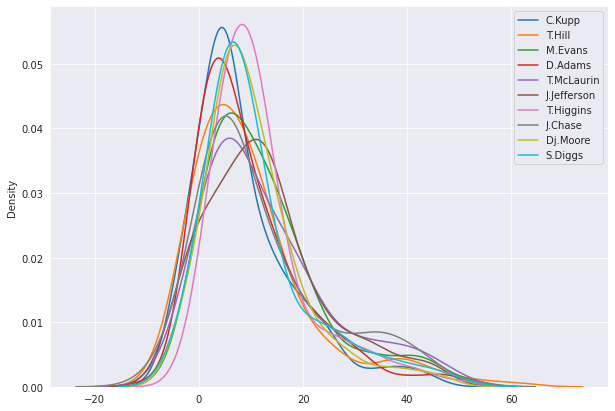

In [ ]:
fix, ax = plt.subplots(figsize=(10,7))
ax.grid(True)

for r in pass_df['receiver_player_id'].unique():
  player_df = pass_df.loc[pass_df['receiver_player_id'] == r]
  air_yards_array = player_df['air_yards'].values
  sns.kdeplot(air_yards_array, ax=ax, label=player_df['receiver_player_name'].values[0])

ax.legend();
# plots player_df and air_yards using seaborn package

In [ ]:
yo.groupby(['game_id', 'receiver_player_id', 'receiver_player_name', 'posteam'], as_index=False) \
['pass_attempt'].sum().sort_values(by='pass_attempt', ascending=False)
# sums pass attempts of all receivers (per game and perspective team) and sorts values in descending fashion. 
# determines best receivers

,game_id,receiver_player_id,receiver_player_name,posteam,pass_attempt
18,2021_01_BAL_LV,00-0031610,D.Waller,LV,19.0
601,2021_03_CIN_PIT,00-0036893,N.Harris,PIT,19.0
608,2021_03_GB_SF,00-0031381,D.Adams,GB,18.0
1885,2021_08_NYG_KC,00-0033040,T.Hill,KC,18.0
67,2021_01_DAL_TB,00-0031544,A.Cooper,DAL,17.0
...,...,...,...,...,...
1800,2021_08_GB_ARI,00-0024243,M.Lewis,GB,1.0
3726,2021_16_DET_ATL,00-0032063,M.Davis,ATL,1.0
1799,2021_08_DAL_MIN,00-0036635,I.Smith-Marsette,MIN,1.0
1795,2021_08_DAL_MIN,00-0035261,T.Pollard,DAL,1.0


In [ ]:
yo.loc[yo['receiver_player_id'].notnull()].groupby(['game_id','posteam'],as_index=False)['pass_attempt'].sum()
# returns non empty values (null vals exist bc of injuries, transfers, COVID protocol, etc.)

,game_id,posteam,pass_attempt
0,2021_01_ARI_TEN,ARI,32.0
1,2021_01_ARI_TEN,TEN,36.0
2,2021_01_BAL_LV,BAL,29.0
3,2021_01_BAL_LV,LV,52.0
4,2021_01_CHI_LA,CHI,40.0
...,...,...,...
565,2021_21_CIN_KC,KC,37.0
566,2021_21_SF_LA,LA,42.0
567,2021_21_SF_LA,SF,29.0
568,2021_22_LA_CIN,CIN,33.0


In [ ]:
target_df = yo.groupby(['game_id', 'receiver_player_id', 'receiver_player_name', 'posteam'], as_index=False) \
['pass_attempt'].sum().merge(
    yo.loc[yo['receiver_player_id'].notnull(), ['game_id','posteam','pass_attempt']].groupby(['game_id', 'posteam'],as_index=False).sum(), on=['game_id', 'posteam'], 
    suffixes=('_player', '_team')
)
target_df.head()
# merges two sets of data on game_id and posteam columns

,game_id,receiver_player_id,receiver_player_name,posteam,pass_attempt_player,pass_attempt_team
0,2021_01_ARI_TEN,00-0027942,A.Green,ARI,6.0,32.0
1,2021_01_ARI_TEN,00-0030155,D.Harris,ARI,3.0,32.0
2,2021_01_ARI_TEN,00-0030564,D.Hopkins,ARI,8.0,32.0
3,2021_01_ARI_TEN,00-0031558,M.Williams,ARI,1.0,32.0
4,2021_01_ARI_TEN,00-0034681,C.Edmonds,ARI,4.0,32.0


In [ ]:
target_df['target_share'] = target_df['pass_attempt_player'] / target_df['pass_attempt_team'] 

target_df.head()
# creates new column in target_df data set: target_share. Which is pass_attempt_player/pass_attempt_team

,game_id,receiver_player_id,receiver_player_name,posteam,pass_attempt_player,pass_attempt_team,target_share
0,2021_01_ARI_TEN,00-0027942,A.Green,ARI,6.0,32.0,0.18750
1,2021_01_ARI_TEN,00-0030155,D.Harris,ARI,3.0,32.0,0.09375
2,2021_01_ARI_TEN,00-0030564,D.Hopkins,ARI,8.0,32.0,0.25000
3,2021_01_ARI_TEN,00-0031558,M.Williams,ARI,1.0,32.0,0.03125
4,2021_01_ARI_TEN,00-0034681,C.Edmonds,ARI,4.0,32.0,0.12500


In [ ]:
target_df = target_df.groupby(['receiver_player_id', 'receiver_player_name', 'posteam'], as_index=False) \
[['target_share', 'pass_attempt_player']].mean().sort_values(by='target_share',ascending=False)

target_df.head()
# find the mean of target_share and pass_attempt_player and sorts vals by target_share

,receiver_player_id,receiver_player_name,posteam,target_share,pass_attempt_player
229,00-0033908,C.Kupp,LA,0.322506,11.142857
74,00-0031381,D.Adams,GB,0.321537,10.588235
462,00-0036322,J.Jefferson,MIN,0.297195,10.000000
305,00-0034827,Dj.Moore,CAR,0.284856,9.647059
397,00-0035676,A.Brown,TEN,0.283858,8.142857


In [ ]:
end_zone_df = yo.loc[yo['pass_attempt'] == 1, ['yardline_100', 'air_yards', 'pass_touchdown', 'receiver_player_id', 'receiver_player_name']] \
.assign(pass_loc=lambda x: x.yardline_100 - x.air_yards)

end_zone_df.sort_values(by='pass_loc').head(10)
# finds all true pass attempts
# using a lambda fxn, returns the difference between yard_line_100 and air_yard values 

,yardline_100,air_yards,pass_touchdown,receiver_player_id,receiver_player_name,pass_loc
39151,7.0,7.0,0.0,00-0035624,N.Harry,0.0
9898,8.0,8.0,0.0,NaN,NaN,0.0
40773,10.0,10.0,1.0,00-0034983,H.Renfrow,0.0
33029,5.0,5.0,0.0,00-0033908,C.Kupp,0.0
9994,16.0,16.0,0.0,00-0030061,Z.Ertz,0.0
10007,1.0,1.0,1.0,00-0036360,C.Edwards-Helaire,0.0
10022,3.0,3.0,1.0,00-0034351,D.Goedert,0.0
33099,19.0,19.0,0.0,00-0031235,O.Beckham,0.0
47863,12.0,12.0,0.0,00-0034775,C.Kirk,0.0
10041,6.0,6.0,1.0,00-0033040,T.Hill,0.0


In [ ]:
end_zone_df.isna().sum()

yardline_100               0
air_yards               1447
pass_touchdown             0
receiver_player_id      2009
receiver_player_name    2009
pass_loc                1447
dtype: int64

In [ ]:
end_zone_df = end_zone_df.dropna()
end_zone_df.shape

(18966, 6)

In [ ]:
end_zone_df['endzone_target'] = end_zone_df['pass_loc'].apply(lambda x: x==0)
end_zone_df.head()
# creates new column in endzone_df: 'endzone_target' 
# returns all pass attempts that failed

In [ ]:
end_zone_df = end_zone_df.groupby(['receiver_player_id', 'receiver_player_name'], as_index=False) \
[['endzone_target', 'pass_touchdown']].sum().sort_values(by='endzone_target', ascending=False)

end_zone_df.head(15)
# returns sum of endzone_target and pass_touchdown and sorts val's by endzone_target to list top receivers

,receiver_player_id,receiver_player_name,endzone_target,pass_touchdown
80,00-0031588,S.Diggs,24,10.0
218,00-0033908,C.Kupp,20,22.0
518,00-0036900,J.Chase,18,14.0
443,00-0036322,J.Jefferson,17,10.0
417,00-0036196,G.Davis,15,11.0
148,00-0033090,H.Henry,15,9.0
371,00-0035640,D.Metcalf,15,12.0
464,00-0036415,V.Jefferson,15,6.0
279,00-0034753,M.Andrews,15,9.0
71,00-0031408,M.Evans,14,16.0


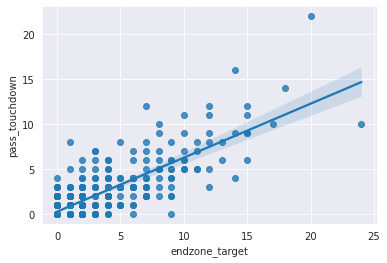

In [ ]:
sns.regplot(x=end_zone_df['endzone_target'], y=end_zone_df['pass_touchdown']);
# sets up x,y plot with endzone_target and pass_touchdown, respectively

In [ ]:
rush_df = yo[['rusher_player_id', 'rusher_player_name', 'yardline_100', 'rush_attempt']]
rush_df = rush_df[rush_df['rush_attempt'] == 1]   

rush_df.head()
# finds all successfull rushing attempts 
# gotta show players like Derrick Henry love

,rusher_player_id,rusher_player_name,yardline_100,rush_attempt
2,00-0032764,D.Henry,75.0,1.0
7,00-0035228,K.Murray,23.0,1.0
10,00-0034681,C.Edmonds,9.0,1.0
18,00-0032764,D.Henry,80.0,1.0
28,00-0032764,D.Henry,75.0,1.0


In [ ]:
player_ids = rush_df['rusher_player_id'].unique()

nueva_data = {
    'rusher_player_id': [],
    '1-10 yardline': [],
    '11 -20 yardline': [],
    '21-30 yardline': [],
    '31-40 yardline': [],
    '41-60 yardline': [],
    '61-80 yardline': [],
    '81-100 yardline': []
}

for p in player_ids:
  player_df = rush_df.loc[rush_df['rusher_player_id'] == p]

  rushes = player_df['yardline_100'].tolist()

  if len(rushes) < 10:
    continue

  nueva_data['rusher_player_id'].append(p)   

  levels = {
      '1-10 yardline': (-1, 11),
      '11 -20 yardline': (10, 21),
      '21-30 yardline': (20, 31),
      '31-40 yardline': (30, 41),
      '41-60 yardline': (40, 61),
      '61-80 yardline': (60, 81),
      '81-100 yardline': (80, 100)

  }

  for l, (min, max) in levels.items():
    num_level_touches = len(list(filter(lambda x: x > min and x < max, rushes)))

    nueva_data[l].append(num_level_touches / len(rushes))

carries_dist = pd.DataFrame(nueva_data)

carries_dist.head()

,rusher_player_id,1-10 yardline,11 -20 yardline,21-30 yardline,31-40 yardline,41-60 yardline,61-80 yardline,81-100 yardline
0,00-0032764,0.087137,0.070539,0.103734,0.107884,0.219917,0.327801,0.082988
1,00-0035228,0.122222,0.155556,0.155556,0.066667,0.222222,0.188889,0.088889
2,00-0034681,0.096774,0.064516,0.056452,0.120968,0.233871,0.314516,0.112903
3,00-0033553,0.140777,0.067961,0.106796,0.106796,0.233010,0.228155,0.116505
4,00-0029701,0.155172,0.086207,0.137931,0.051724,0.310345,0.224138,0.034483


In [ ]:
player_id_table = yo.loc[yo['rush_attempt'] == 1, ['rusher_player_id', 'rusher_player_name']] \
.groupby('rusher_player_id', as_index=False).first()
player_id_table.head()

,rusher_player_id,rusher_player_name
0,00-0019596,T.Brady
1,00-0022824,A.Lee
2,00-0022924,B.Roethlisberger
3,00-0023459,Aa.Rodgers
4,00-0023682,R.Fitzpatrick


In [ ]:
carries_dist = carries_dist.merge(player_id_table, on='rusher_player_id')
# merges carries_dist table with player_id table, on mutual rusher_player_id column
carries_dist.head()

,rusher_player_id,1-10 yardline,11 -20 yardline,21-30 yardline,31-40 yardline,41-60 yardline,61-80 yardline,81-100 yardline,rusher_player_name
0,00-0032764,0.087137,0.070539,0.103734,0.107884,0.219917,0.327801,0.082988,D.Henry
1,00-0035228,0.122222,0.155556,0.155556,0.066667,0.222222,0.188889,0.088889,K.Murray
2,00-0034681,0.096774,0.064516,0.056452,0.120968,0.233871,0.314516,0.112903,C.Edmonds
3,00-0033553,0.140777,0.067961,0.106796,0.106796,0.233010,0.228155,0.116505,J.Conner
4,00-0029701,0.155172,0.086207,0.137931,0.051724,0.310345,0.224138,0.034483,R.Tannehill


In [ ]:
notable_players = yo.loc[yo['rush_attempt'] == 1, ['rusher_player_id', 'rusher_player_name', 'rush_touchdown']] 
notable_players = notable_players.groupby(['rusher_player_id', 'rusher_player_name'], as_index=False)['rush_touchdown'].sum()
                                                                                          
qbs = ['K. Murray', 'C.Newton', 'L.Jackson', 'J.Allen', 'C.Wentz']

notable_players = notable_players.loc[notable_players['rusher_player_name'].isin(qbs)]  

notable_players = notable_players.sort_values(by='rush_touchdown', ascending=False).head(20)

notable_players = notable_players[['rusher_player_id', 'rusher_player_name']]

notable_players

,rusher_player_id,rusher_player_name
19,00-0027939,C.Newton
214,00-0034857,J.Allen
204,00-0034796,L.Jackson
104,00-0032950,C.Wentz


,rusher_player_id,1-10 yardline,11 -20 yardline,21-30 yardline,31-40 yardline,41-60 yardline,61-80 yardline,81-100 yardline
rusher_player_name,,,,,,,,
L.Jackson,00-0034796,0.059701,0.067164,0.052239,0.097015,0.298507,0.365672,0.059701
C.Newton,00-0027939,0.125000,0.083333,0.104167,0.041667,0.270833,0.291667,0.083333
C.Wentz,00-0032950,0.137931,0.034483,0.068966,0.103448,0.362069,0.189655,0.103448
J.Allen,00-0034857,0.141844,0.113475,0.127660,0.177305,0.241135,0.170213,0.028369


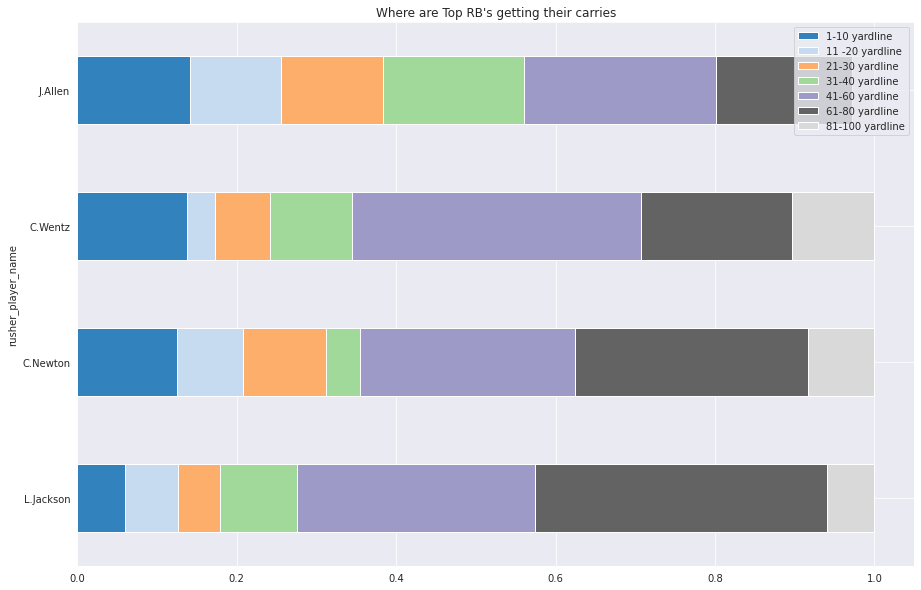

In [ ]:
carries_dist_copy = carries_dist.copy()
# creates a copy of the carries_dist data frame
 
carries_dist_copy = carries_dist_copy.loc[carries_dist_copy['rusher_player_id'].isin(notable_players['rusher_player_id'])]
# thru the copy of the carries_distance data frame, we locate rusher player id in both carries dist and notable players

carries_dist_copy = carries_dist_copy.set_index('rusher_player_name')
# we create a new index to allocate all data to rusher player name

carries_dist_copy = carries_dist_copy.sort_values(by='1-10 yardline')

ax = carries_dist_copy.plot.barh(stacked=True, colormap='tab20c')

fig = plt.gcf()

fig.set_size_inches(15,10)

ax.legend(loc=1)

ax.set_title('Where are Top RB\'s getting their carries')

carries_dist_copy.head()


In [ ]:
def search_columns(search_term):
  for c in yo.columns:
    if search_term in c:
      print(c)
search_columns('epa')

# the fxn, search columns does this:
# for each 'c' in data frame 'yo' columns
# if parameter 'search term' is in for variable 'c'
# we find and print those values, which is represented by 'c'
# the parameter in question is 'epa'

epa
total_home_epa
total_away_epa
total_home_rush_epa
total_away_rush_epa
total_home_pass_epa
total_away_pass_epa
air_epa
yac_epa
comp_air_epa
comp_yac_epa
total_home_comp_air_epa
total_away_comp_air_epa
total_home_comp_yac_epa
total_away_comp_yac_epa
total_home_raw_air_epa
total_away_raw_air_epa
total_home_raw_yac_epa
total_away_raw_yac_epa
qb_epa
xyac_epa


In [ ]:
epa = yo.loc[yo['pass_attempt'] == 1, ['passer_player_id', 'passer_player_name', 'pass_attempt', 'qb_epa']]
epa.head()

,passer_player_id,passer_player_name,pass_attempt,qb_epa
3,00-0029701,R.Tannehill,1.0,0.032412
4,00-0029701,R.Tannehill,1.0,-1.532898
6,00-0035228,K.Murray,1.0,2.692890
8,00-0035228,K.Murray,1.0,-0.511090
9,00-0035228,K.Murray,1.0,2.182015


In [ ]:
epa = epa.groupby(['passer_player_id', 'passer_player_name'], as_index=False).sum()

epa.head()

,passer_player_id,passer_player_name,pass_attempt,qb_epa
0,00-0019596,T.Brady,840.0,139.038767
1,00-0022824,A.Lee,1.0,-0.947000
2,00-0022924,B.Roethlisberger,694.0,-48.948385
3,00-0023459,A.Rodgers,321.0,86.752123
4,00-0023459,Aa.Rodgers,275.0,39.896753


In [ ]:
epa['epa/dropback'] = epa['qb_epa'] / epa['pass_attempt']
epa.head()

,passer_player_id,passer_player_name,pass_attempt,qb_epa,epa/dropback
0,00-0019596,T.Brady,840.0,139.038767,0.165522
1,00-0022824,A.Lee,1.0,-0.947000,-0.947000
2,00-0022924,B.Roethlisberger,694.0,-48.948385,-0.070531
3,00-0023459,A.Rodgers,321.0,86.752123,0.270256
4,00-0023459,Aa.Rodgers,275.0,39.896753,0.145079


In [ ]:
epa.loc[epa['pass_attempt'] > 50].sort_values(by='epa/dropback', ascending=False).head(10)
# locate 'pass attempt' in epa data frame that are greater than 50 
# sort values by epa_dropp back in descending format. 
# locate top 10 players


,passer_player_id,passer_player_name,pass_attempt,qb_epa,epa/dropback
11,00-0026300,J.Johnson,88.0,27.387477,0.311221
3,00-0023459,A.Rodgers,321.0,86.752123,0.270256
96,00-0035289,G.Minshew,66.0,15.881598,0.240630
12,00-0026498,M.Stafford,781.0,166.161984,0.212755
70,00-0033873,P.Mahomes,819.0,173.842165,0.212261
115,00-0036355,J.Herbert,710.0,121.555704,0.171205
40,00-0031345,J.Garoppolo,550.0,91.929664,0.167145
0,00-0019596,T.Brady,840.0,139.038767,0.165522
86,00-0034857,J.Allen,696.0,103.829112,0.149180
4,00-0023459,Aa.Rodgers,275.0,39.896753,0.145079


In [ ]:
search_columns('scramble')

qb_scramble


In [ ]:
scrambles = yo.loc[yo['qb_scramble'] == 1, ['rusher_player_id', 'rush_attempt', 'epa']]

scrambles = scrambles.groupby(['rusher_player_id'],as_index=False).sum()

scrambles = scrambles.rename(columns={
    'rusher_player_id': 'passer_player_id',
    'epa': 'scramble_epa',
    'rush_attempt': 'scrambles'
})

scrambles.head() 

,passer_player_id,scrambles,scramble_epa
0,00-0019596,10.0,4.327534
1,00-0022924,3.0,4.843227
2,00-0023459,17.0,12.095155
3,00-0023682,1.0,-1.195524
4,00-0026143,17.0,-3.568032


In [ ]:
epa = epa.merge(scrambles,on='passer_player_id')
epa.head()

,passer_player_id,passer_player_name,pass_attempt,qb_epa,epa/dropback,scrambles,scramble_epa
0,00-0019596,T.Brady,840.0,139.038767,0.165522,10.0,4.327534
1,00-0022924,B.Roethlisberger,694.0,-48.948385,-0.070531,3.0,4.843227
2,00-0023459,A.Rodgers,321.0,86.752123,0.270256,17.0,12.095155
3,00-0023459,Aa.Rodgers,275.0,39.896753,0.145079,17.0,12.095155
4,00-0023682,R.Fitzpatrick,7.0,-4.274623,-0.610660,1.0,-1.195524


In [ ]:
epa['total_dropbacks'] = epa['pass_attempt'] + epa['scrambles']
# creation of a new column in data frame 'epa'. This combines epa pass attempts and scrambles

epa['total_epa'] = epa['qb_epa'] + epa['scramble_epa']
# creation of a new column in data frame. Combines epa qb_epa and scramble_epa

epa['true_epa/dropback'] = epa['total_epa'] / epa['total_dropbacks']
# creation of new column in data frame, 'epa'. product of division of epa total epa and epa total_dropbacks`

epa.head() 

,passer_player_id,passer_player_name,pass_attempt,qb_epa,epa/dropback,scrambles,scramble_epa,total_dropbacks,total_epa,true_epa/dropback
0,00-0019596,T.Brady,840.0,139.038767,0.165522,10.0,4.327534,850.0,143.366301,0.168666
1,00-0022924,B.Roethlisberger,694.0,-48.948385,-0.070531,3.0,4.843227,697.0,-44.105158,-0.063279
2,00-0023459,A.Rodgers,321.0,86.752123,0.270256,17.0,12.095155,338.0,98.847278,0.292448
3,00-0023459,Aa.Rodgers,275.0,39.896753,0.145079,17.0,12.095155,292.0,51.991908,0.178054
4,00-0023682,R.Fitzpatrick,7.0,-4.274623,-0.610660,1.0,-1.195524,8.0,-5.470147,-0.683768


In [ ]:
epa = epa.loc[epa['pass_attempt'] > 50, ['passer_player_name', 'true_epa/dropback']].sort_values(by='true_epa/dropback').reset_index(drop=True)

# locate pass attempts that are greater than 50. Include the columns 'passer_player_name' and 'true_epa.dropback'. 
# sort the values according to 'true_epa/dropback'

epa.head()

,passer_player_name,true_epa/dropback
0,M.Glennon,-0.437164
1,J.Fromm,-0.411971
2,C.Newton,-0.263983
3,Z.Wilson,-0.193068
4,T.Taylor,-0.169014


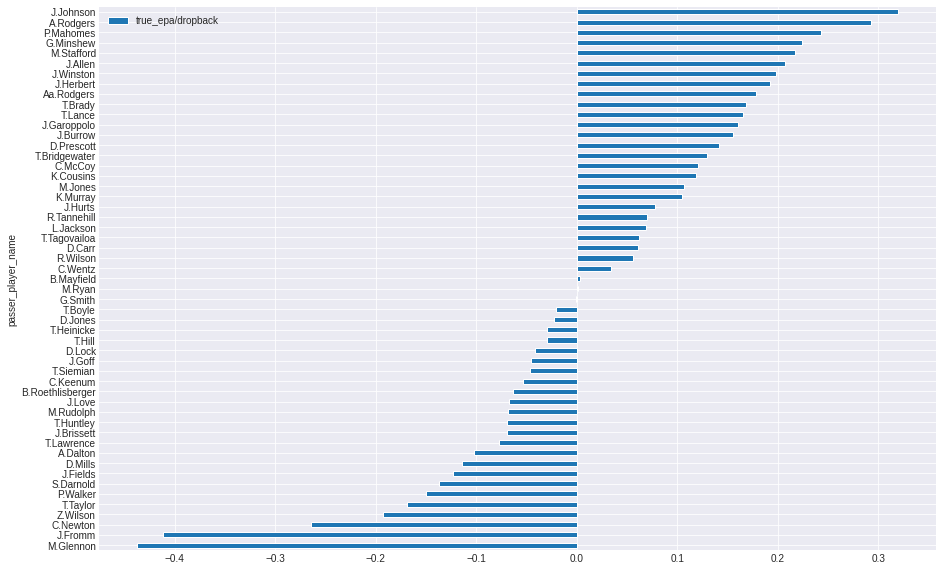

In [ ]:
plt.style.use('seaborn-darkgrid')

ax = epa.set_index('passer_player_name').plot.barh()

fig = plt.gcf(); fig.set_size_inches(15, 10)

